In [47]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

In [48]:
x = np.random.rand(6)
y = np.random.rand(6)

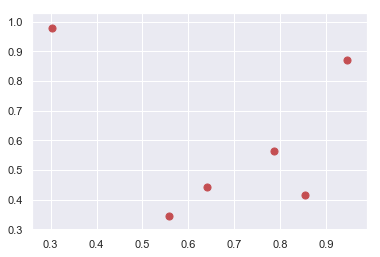

In [49]:
plt.scatter(x, y, c='r', s=50)

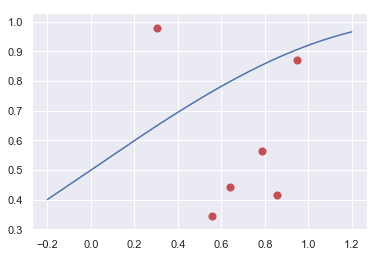

In [50]:
def myPlot(n = 1):
    plt.scatter(x, y, c='r', s=50)
    t = np.linspace(-0.2, 1.2, 1000)
    plt.plot(t, 0.5*np.sin(n*t) + 0.5)
myPlot()

In [51]:
from ipywidgets import interact
# 當n = 200 就會發生 overfitting
interact(myPlot, n = (1, 200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myPlot(n=1)>

## 線性迴歸
$$f(x) = 1.2x + 0.8 + \varepsilon$$

In [52]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.3*np.random.randn(200)

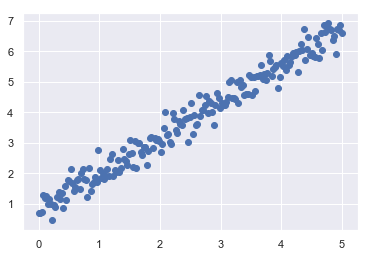

In [53]:
plt.scatter(x, y)

### 分訓練資料和測試資料

In [54]:
#在sklearn，幫你選擇隨機的訓練資料和操是資料，把它切開
from sklearn.model_selection import train_test_split

#### 小重點
機器學習（數據分析），輸入資料$$[x_1, x_2, x_3....]$$喜歡放成$$[[x_1], [x_2], [x_3]....]$$意思就是本來的n為數列要變成nx1

In [55]:
    x.shape

(200,)

In [56]:
x = x.reshape(200, 1)

In [57]:
# random_state = 0 讓test_size = 0.2 ，測試資料的20%不會每次都不一樣
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test

(array([[3.36683417],
        [1.65829146],
        [0.65326633],
        [2.83919598],
        [4.22110553],
        [1.58291457],
        [0.20100503],
        [1.88442211],
        [2.96482412],
        [3.59296482],
        [1.7839196 ],
        [3.11557789],
        [4.62311558],
        [2.43718593],
        [3.74371859],
        [0.60301508],
        [0.75376884],
        [4.0201005 ],
        [1.00502513],
        [1.40703518],
        [3.29145729],
        [2.4120603 ],
        [4.54773869],
        [0.47738693],
        [3.84422111],
        [2.31155779],
        [1.35678392],
        [4.09547739],
        [1.28140704],
        [2.16080402],
        [3.49246231],
        [2.26130653],
        [3.44221106],
        [2.53768844],
        [3.61809045],
        [2.2361809 ],
        [2.73869347],
        [0.35175879],
        [0.67839196],
        [3.54271357],
        [4.69849246],
        [1.15577889],
        [3.46733668],
        [4.89949749],
        [2.71356784],
        [1

### 準備做線性迴歸
所有函數學習，包括線性迴歸、機器學習、神經網路都是做三部曲：
1. 開一台函數學習機
2. 訓練
3. 預測

In [58]:
# 函數學習機裡的線性迴歸
from sklearn.linear_model import LinearRegression

In [59]:
myModel = LinearRegression()

#### step 2. 學習（訓練）

In [60]:
myModel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### step3. 預測

In [61]:
myModel.predict([[10], [5]])

array([12.66542276,  6.73121735])

In [62]:
y_predict = myModel.predict(x_test)

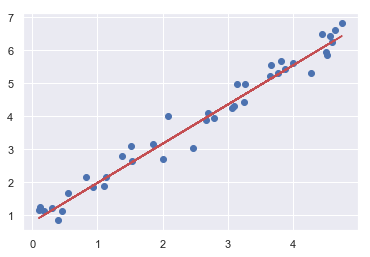

In [63]:
plt.scatter(x_test.ravel(), y_test)
plt.plot(x_test.ravel(), y_predict, 'r')

## 房價預測

In [64]:
from sklearn.datasets import load_boston

In [65]:
boston_dataset = load_boston()

In [66]:
# 先將資料一一列印出來看看裡面是什麼，會發現DESCR為該資料的描述文字
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [67]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
len(boston_dataset.feature_names)

13

In [69]:
boston_dataset.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [70]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [71]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
boston['MEDV'] = boston_dataset.target

In [73]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


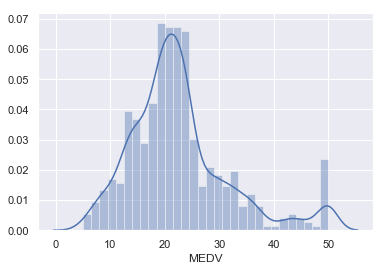

In [75]:
sns.distplot(boston['MEDV'], bins = 30)

## 準備訓練資料

In [76]:
x = boston.loc[:, "CRIM":"LSTAT"].values
y = boston.MEDV

In [77]:
x[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [78]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [79]:
len(x_train)

404

In [80]:
len(x_test)

102

In [81]:
myModel = LinearRegression()

In [82]:
myModel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
y_predict = myModel.predict(x_test)

In [84]:
sns.set()

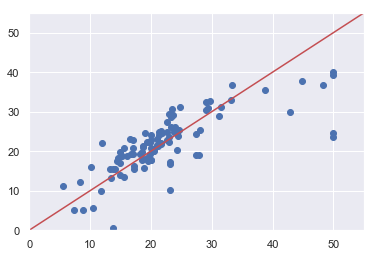

In [85]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0, 55], [0, 55], 'r')

In [86]:
x_train[87]
# 所有的參數都壓在0到1之間

# 相關係數
correlation_matrix = boston.corr().round(2)

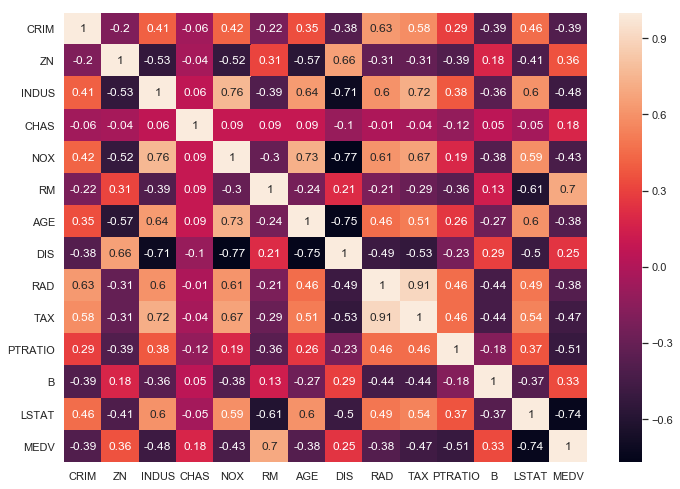

In [43]:
# 改方格大小
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(correlation_matrix, annot=True)